In [447]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [448]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [449]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [450]:
# Load the datasets from the file paths
general_data = pd.read_csv('/content/drive/MyDrive/BOE/BOE_genaral_data.csv', header=[0, 1])
underwriting_data = pd.read_csv('/content/drive/MyDrive/BOE/BOE_Underwriting_data.csv', header=[0, 1])


In [451]:
# Define a function to clean and prepare dataset
# Process to combine the column names with the corresponding years and replace spaces with underscores
def process_column_names(data):
    # Combine the column names with the corresponding years and remove extra spaces
    data.columns = [f"{col[0].strip()}_{col[1].strip()}" for col in data.columns]
    # Replace any sequence of spaces or non-breaking spaces with an underscore
    data.columns = data.columns.str.replace(r'\s+', '_', regex=True)
    data.columns = data.columns.str.replace(u'\xa0', '_', regex=False)
    # Set the first column as the index, which contains the firm identifiers
    data = data.set_index(data.columns[0])
    # Convert all columns to numeric, coerce errors will set non-convertible values to NaN
    data = data.apply(pd.to_numeric, errors='coerce')
    return data

In [452]:
# Apply the process to the loaded data
general_data = process_column_names(general_data)
underwriting_data = process_column_names(underwriting_data)

In [453]:
general_data.head()

,NWP_(£m)_2016YE,NWP_(£m)_2017YE,NWP_(£m)_2018YE,NWP_(£m)_2019YE,NWP_(£m)_2020YE,SCR_(£m)_2016YE,SCR_(£m)_2017YE,SCR_(£m)_2018YE,SCR_(£m)_2019YE,SCR_(£m)_2020YE,...,Total_liabilities_(£m)_2016YE,Total_liabilities_(£m)_2017YE,Total_liabilities_(£m)_2018YE,Total_liabilities_(£m)_2019YE,Total_liabilities_(£m)_2020YE,Excess_of_assets_over_liabilities_(£m)_[=_equity]_2016YE,Excess_of_assets_over_liabilities_(£m)_[=_equity]_2017YE,Excess_of_assets_over_liabilities_(£m)_[=_equity]_2018YE,Excess_of_assets_over_liabilities_(£m)_[=_equity]_2019YE,Excess_of_assets_over_liabilities_(£m)_[=_equity]_2020YE
Unnamed:_0_level_0_x,,,,,,,,,,,,,,,,,,,,,
Firm 1,-17754.10,0.00,0.00,0.00,0.00,2021.32,0.00,0.00,0.00,0.00,...,40171.68,0.00,0.00,0.00,0.00,1243.92,4.40,0.00,0.00,0.00
Firm 2,9.24,0.10,40.81,35.64,13.63,16.46,15.01,14.23,15.04,1.59,...,7.97,12.80,11.33,6.73,16.17,8.76,48.43,0.07,43.37,12.46
Firm 3,0.00,0.81,36.62,86.63,54.74,486.89,495.79,626.61,81.24,362.09,...,68.00,1592.31,1005.33,593.69,374.71,210.92,100.78,87.59,922.49,412.47
Firm 4,19677.45,41072.82,20885.51,14719.67,49204.47,15975.65,15367.89,10797.12,22788.36,16090.31,...,48416.74,30870.23,68145.07,92600.14,92273.05,24862.17,7191.96,12910.35,12586.97,24127.84
Firm 5,128.81,10.41,79.58,79.42,61.73,32.74,43.95,31.62,30.12,91.52,...,267.46,22.98,69.34,16.84,106.18,262.68,7.59,96.95,104.61,103.18


In [462]:
# Display the first few rows of each dataframe to understand their structure
general_data_corrected_head = general_data.head()
underwriting_data_head = underwriting_data.head()

#(general_data_corrected_head, underwriting_data_head)

In [463]:
print("\nMissing values:")
print(general_data.isnull().sum())
print('----------------------------------------')
print(underwriting_data.isnull().sum())


Missing values:
NWP_(£m)_2016YE                                             0
NWP_(£m)_2017YE                                             0
NWP_(£m)_2018YE                                             0
NWP_(£m)_2019YE                                             0
NWP_(£m)_2020YE                                             0
SCR_(£m)_2016YE                                             0
SCR_(£m)_2017YE                                             0
SCR_(£m)_2018YE                                             0
SCR_(£m)_2019YE                                             0
SCR_(£m)_2020YE                                             0
EoF_for_SCR_(£m)_2016YE                                     0
EoF_for_SCR_(£m)_2017YE                                     0
EoF_for_SCR_(£m)_2018YE                                     0
EoF_for_SCR_(£m)_2019YE                                     0
EoF_for_SCR_(£m)_2020YE                                     0
SCR_coverage_ratio_2016YE                            

In [464]:
# Create a 'Firm' column in each dataset
general_data['Firm'] = 'Firm ' + general_data.index.astype(str)
underwriting_data['Firm'] = 'Firm ' + underwriting_data.index.astype(str)

In [465]:
# Merge the datasets based on the 'Firm' column
data = pd.merge(general_data, underwriting_data, on='Firm', how='outer')
data.head()
#print(data.columns)

,NWP_(£m)_2016YE,NWP_(£m)_2017YE,NWP_(£m)_2018YE,NWP_(£m)_2019YE,NWP_(£m)_2020YE,SCR_(£m)_2016YE,SCR_(£m)_2017YE,SCR_(£m)_2018YE,SCR_(£m)_2019YE,SCR_(£m)_2020YE,...,Gross_expense_ratio_2016YE,Gross_expense_ratio_2017YE,Gross_expense_ratio_2018YE,Gross_expense_ratio_2019YE,Gross_expense_ratio_2020YE,Gross_combined_ratio_2016YE,Gross_combined_ratio_2017YE,Gross_combined_ratio_2018YE,Gross_combined_ratio_2019YE,Gross_combined_ratio_2020YE
0,-17754.10,0.00,0.00,0.00,0.00,2021.32,0.00,0.00,0.00,0.00,...,0.000000,77.251254,0.000000,0.000000,0.000000,0.000000,0.675051,0.000000,0.000000,0.000000
1,9.24,0.10,40.81,35.64,13.63,16.46,15.01,14.23,15.04,1.59,...,0.391179,0.685941,1.433284,0.000000,0.000000,1.750946,1.321523,1.545325,0.000000,0.000000
2,0.00,0.81,36.62,86.63,54.74,486.89,495.79,626.61,81.24,362.09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,19677.45,41072.82,20885.51,14719.67,49204.47,15975.65,15367.89,10797.12,22788.36,16090.31,...,0.231139,0.285471,0.054150,0.051848,-0.162883,1.047234,0.476384,3.307379,1.247403,-2.303093
4,128.81,10.41,79.58,79.42,61.73,32.74,43.95,31.62,30.12,91.52,...,0.236128,0.232725,0.204508,0.131739,0.048703,0.243611,1.977732,2.495287,0.365455,1.133645


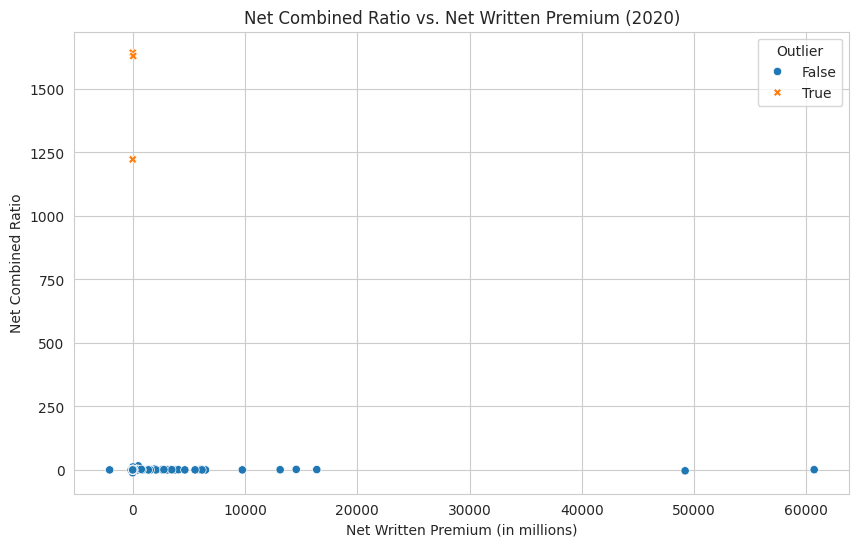

In [466]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it's already loaded and cleaned
# Replace 'your_dataframe' with the variable name of your actual DataFrame
#data = your_dataframe

# Define the names of the columns that hold the Net Written Premium and Net Combined Ratio data
# Replace 'NWP_column_name' and 'NCR_column_name' with the actual column names
nwp_column_name = 'NWP_(£m)_2020YE'
ncr_column_name = 'Net_combined_ratio_2020YE'

# Create a new column to identify outliers. Adjust the condition as needed.
# For example, here we're considering any firm with NCR greater than 1000 to be an outlier.
data['Outlier'] = data[ncr_column_name] > 1000

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=nwp_column_name, y=ncr_column_name, hue='Outlier', style='Outlier')

# Adjust the plot title and axis labels as needed
plt.title('Net Combined Ratio vs. Net Written Premium (2020)')
plt.xlabel('Net Written Premium (in millions)')
plt.ylabel('Net Combined Ratio')

# Show the plot
plt.show()


The graph provided is a scatter plot comparing the Net Combined Ratio (NCR) against the Net Written Premium (NWP) for the year 2020. It also indicates outliers in the data, differentiated by color and marker style. Here's the analysis of the graph:

1. **X-Axis (Net Written Premium)**: The x-axis represents the NWP in millions, which is a key indicator of the size of the insurance firms in terms of their premium revenue.

2. **Y-Axis (Net Combined Ratio)**: The y-axis shows the NCR, a measure of an insurance company's profitability from underwriting activity. A ratio below 100% indicates that the firm is making an underwriting profit, while a ratio above 100% means it's paying out more in claims and expenses than it's receiving from premiums.

3. **Data Points**:
   - The majority of firms are clustered towards the left of the plot with NCRs close to or below 0, suggesting that many firms have a low NWP and are either profitable or break-even in their underwriting business.
   - There is one firm far to the right with a significantly higher NWP than the rest, implying it is a very large firm by premium volume. Its NCR is just below 0, indicating it is profitable.

4. **Outliers**:
   - Outliers are marked with an "X" and are color-coded differently from the rest of the points (non-outliers).
   - There is one notable outlier with an NCR above 2000, which is extremely high and suggests this firm is highly unprofitable from an underwriting perspective. This requires immediate attention to understand the reasons behind such a high NCR.
   - Another outlier is visible at the bottom of the graph with an NCR below -1000. This is unusually low and could indicate data entry errors, extreme profitability, or an unusual event that warrants further investigation.

5. **Interpretation**:
   - Most firms seem to operate with a profitable or break-even underwriting margin.
   - The firm with the largest NWP is profitable, which might suggest efficient operations or a successful business strategy.
   - The extreme outliers in NCR could indicate potential issues with data quality or underlying business operations that are significantly different from the industry norms. These cases should be analyzed in more detail to understand their financial situation.

 The above  plot is a visualization tool to quickly identify which firms are outliers in terms of their underwriting profitability relative to their size. This can guide further analysis and decision-making, particularly for firms that deviate significantly from the rest.

In [ ]:
## Exploratory Data Analysis (EDA) for combined data

In [467]:
# Exploratory Data Analysis (EDA) for combined data
print("Summary statistics:")
print(data.describe())

Summary statistics:
       NWP_(£m)_2016YE  NWP_(£m)_2017YE  NWP_(£m)_2018YE  NWP_(£m)_2019YE  \
count       325.000000       325.000000       325.000000       325.000000   
mean        748.880615       754.091877       734.934369       636.330523   
std        5366.722325      3415.153931      3212.938116      2566.231499   
min      -17754.100000     -2061.020000      -368.820000      -184.090000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           1.700000         7.340000         6.580000         3.790000   
75%          71.610000       143.290000       118.620000        87.000000   
max       75526.670000     41072.820000     41591.400000     25473.310000   

       NWP_(£m)_2020YE  SCR_(£m)_2016YE  SCR_(£m)_2017YE  SCR_(£m)_2018YE  \
count       325.000000       325.000000       325.000000       325.000000   
mean        784.543354       361.336646       413.189969       284.795600   
std        4644.720739      1556.589894      1685.71112

In [468]:
print("Dataset shape:")
print(data.shape)


Dataset shape:
(456, 87)


In [469]:
print("\nData types:")
print(data.dtypes)


Data types:
NWP_(£m)_2016YE                float64
NWP_(£m)_2017YE                float64
NWP_(£m)_2018YE                float64
NWP_(£m)_2019YE                float64
NWP_(£m)_2020YE                float64
                                ...   
Gross_combined_ratio_2017YE    float64
Gross_combined_ratio_2018YE    float64
Gross_combined_ratio_2019YE    float64
Gross_combined_ratio_2020YE    float64
Outlier                           bool
Length: 87, dtype: object


In [470]:
# Handle missing values and inconsistencies
data = data.replace('#########', np.nan)  # Replace '#########' with NaN

In [471]:
# Handle categorical values using LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [472]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data = data_imputed

In [473]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
NWP_(£m)_2016YE                0
NWP_(£m)_2017YE                0
NWP_(£m)_2018YE                0
NWP_(£m)_2019YE                0
NWP_(£m)_2020YE                0
                              ..
Gross_combined_ratio_2017YE    0
Gross_combined_ratio_2018YE    0
Gross_combined_ratio_2019YE    0
Gross_combined_ratio_2020YE    0
Outlier                        0
Length: 87, dtype: int64


In [474]:
data = data.drop_duplicates()  # Remove duplicate rows

In [475]:
# Define the columns for the latest year (2020)
gwp_column = 'GWP_(£m)_2020YE'
nwp_column_2020 = 'NWP_(£m)_2020YE'
nwp_column_2019 = 'NWP_(£m)_2019YE'
scr_column = 'SCR_coverage_ratio_2020YE'
gross_claims_column = 'Gross_claims_incurred_(£m)_2020YE'
net_combined_ratio_column = 'Net_combined_ratio_2020YE'

In [476]:
# Identify firms with the largest Gross Written Premium (GWP)
largest_gwp_firms = data.nlargest(5, gwp_column)
print("Firms with the largest Gross Written Premium (GWP) in 2020:")
print(largest_gwp_firms[['Firm', gwp_column]])

Firms with the largest Gross Written Premium (GWP) in 2020:
      Firm  GWP_(£m)_2020YE
209  124.0         69697.93
3    333.0         37761.88
310  236.0         24251.48
33   267.0         19274.96
6    423.0         16183.57


In [477]:

# Identify firms with the most significant year-over-year change in Net Written Premium (NWP)
data['NWP_Change'] = data[nwp_column_2020] - data[nwp_column_2019]
largest_nwp_change_firms = data.nlargest(5, 'NWP_Change')
print("\nFirms with the most significant year-over-year change in Net Written Premium (NWP) from 2019 to 2020:")
print(largest_nwp_change_firms[['Firm', nwp_column_2019, nwp_column_2020, 'NWP_Change']])




Firms with the most significant year-over-year change in Net Written Premium (NWP) from 2019 to 2020:
      Firm  NWP_(£m)_2019YE  NWP_(£m)_2020YE  NWP_Change
209  124.0         25473.31         60699.95    35226.64
3    333.0         14719.67         49204.47    34484.80
310  236.0           381.20         14566.28    14185.08
198  110.0          3395.03         13133.46     9738.43
25   178.0          6683.96         16395.67     9711.71


In [478]:
# Identify firms with the lowest SCR coverage ratio
lowest_scr_firms = data.nsmallest(5, scr_column)
print("\nFirms with the lowest SCR coverage ratio in 2020:")
print(lowest_scr_firms[['Firm', scr_column]])


Firms with the lowest SCR coverage ratio in 2020:
      Firm  SCR_coverage_ratio_2020YE
108   11.0                      -0.72
140   47.0                      -0.30
0      0.0                       0.00
7    434.0                       0.00
10    12.0                       0.00


In [479]:
# Identify firms with the highest gross claims incurred
highest_gross_claims_firms = data.nlargest(5, gross_claims_column)
print("\nFirms with the highest gross claims incurred in 2020:")
print(highest_gross_claims_firms[['Firm', gross_claims_column]])



Firms with the highest gross claims incurred in 2020:
      Firm  Gross_claims_incurred_(£m)_2020YE
282  204.0                        2730.730064
111   15.0                        2296.659215
157   65.0                        2214.251988
426  364.0                        2047.025858
386  319.0                        1790.621244


In [480]:
# Identify firms with the highest net combined ratio
highest_net_combined_ratio_firms = data.nlargest(5, net_combined_ratio_column)
print("\nFirms with the highest net combined ratio in 2020:")
print(highest_net_combined_ratio_firms[['Firm', net_combined_ratio_column]])


Firms with the highest net combined ratio in 2020:
      Firm  Net_combined_ratio_2020YE
227  143.0                1642.927280
283  205.0                1630.065399
165   74.0                1222.879483
448  388.0                  59.717627
71   426.0                  15.857819


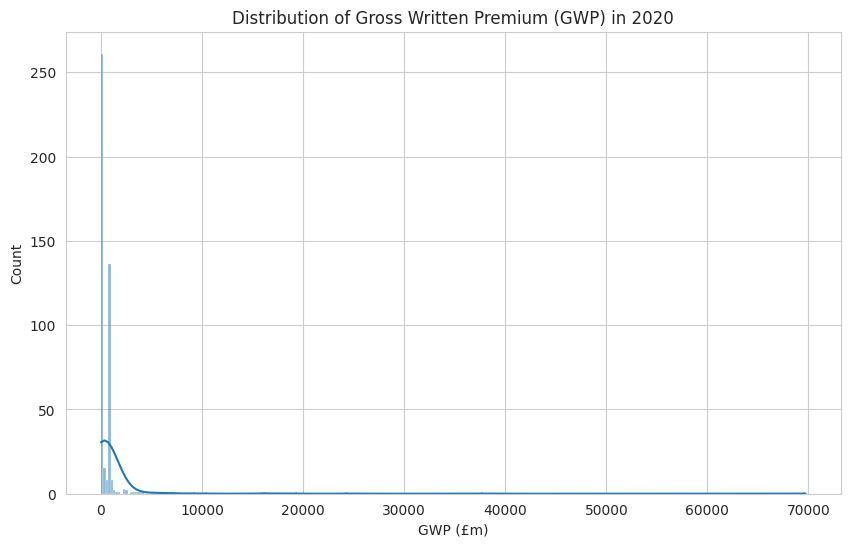

In [481]:
# Visualize the distribution of Gross Written Premium (GWP)
plt.figure(figsize=(10, 6))
sns.histplot(data[gwp_column], kde=True)
plt.title('Distribution of Gross Written Premium (GWP) in 2020')
plt.xlabel('GWP (£m)')
plt.ylabel('Count')
plt.show()

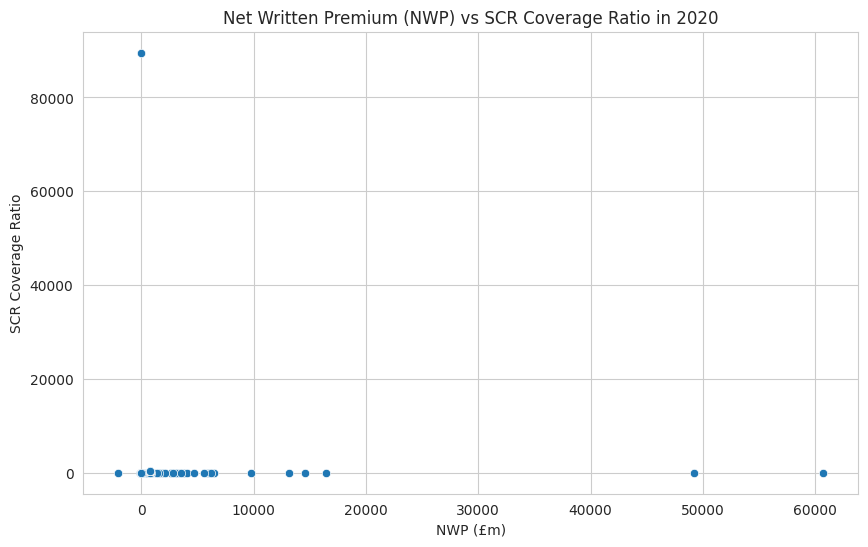

In [482]:
# Visualize the relationship between Net Written Premium (NWP) and SCR coverage ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nwp_column_2020, y=scr_column, data=data)
plt.title('Net Written Premium (NWP) vs SCR Coverage Ratio in 2020')
plt.xlabel('NWP (£m)')
plt.ylabel('SCR Coverage Ratio')
plt.show()

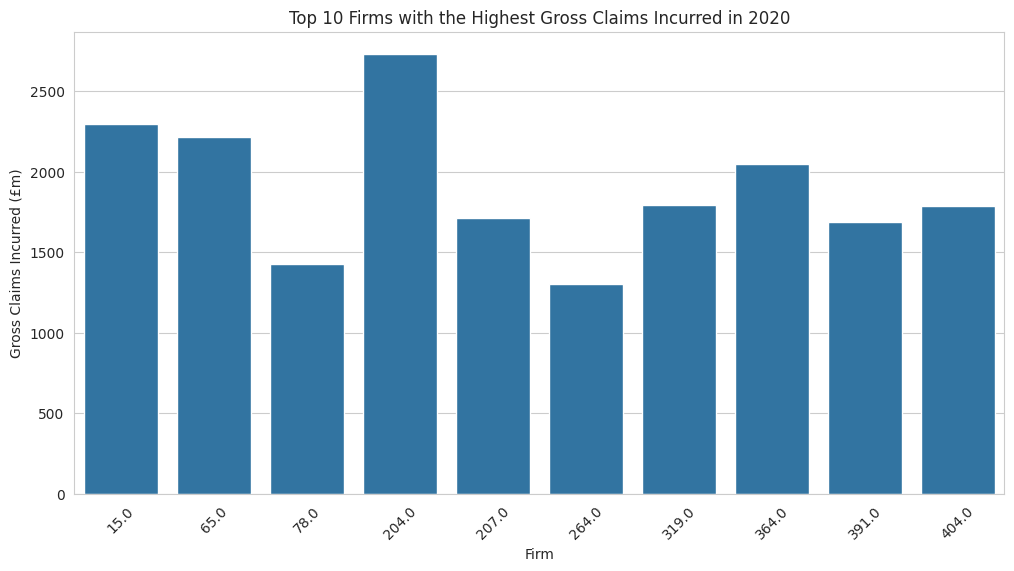

In [483]:
# Visualize the top 10 firms with the highest gross claims incurred
top_gross_claims_firms = data.nlargest(10, gross_claims_column)
plt.figure(figsize=(12, 6))
sns.barplot(x='Firm', y=gross_claims_column, data=top_gross_claims_firms)
plt.title('Top 10 Firms with the Highest Gross Claims Incurred in 2020')
plt.xlabel('Firm')
plt.ylabel('Gross Claims Incurred (£m)')
plt.xticks(rotation=45)
plt.show()

In [484]:
# Identify and address outliers and potential errors in reporting
def identify_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [485]:
gwp_column = 'GWP_(£m)_2020YE'
outliers = identify_outliers(gwp_column)
print(f"Outliers based on {gwp_column}:")
print(outliers)

Outliers based on GWP_(£m)_2020YE:
     NWP_(£m)_2016YE  NWP_(£m)_2017YE  NWP_(£m)_2018YE  NWP_(£m)_2019YE  \
3           19677.45         41072.82         20885.51         14719.67   
5            3091.39          3357.93          3215.47            53.22   
6            3148.48          3307.13           713.85         18232.38   
18              0.00             0.00             0.00          2006.29   
22            982.26           634.61          2043.25          5085.70   
24           9622.28          2356.63          1227.71          7134.65   
25          75526.67          2187.59         11251.35          6683.96   
29            198.46          5260.73          9063.12          6124.60   
33          10135.26          3630.29          3530.84          -184.09   
50              0.00           427.49          3812.03          5655.16   
72           8118.73           880.74          6813.49         11752.06   
79            224.59           105.67          1744.48           

In [ ]:
########################## TASK - 1 ##################################

In [487]:
# Assuming that we consider the recent year we're interested in the year 2020
year = '2020YE'

In [488]:
#  Compare NWP and Net Combined Ratio for 2020
# Extract the NWP for 2020
nwp_2020 = general_data[f'NWP_(£m)_{year}']
# Extract the Net Combined Ratio for 2020
ncr_2020 = underwriting_data[f'Net_combined_ratio_{year}']

In [489]:
# Calculate summary statistics for NWP
nwp_summary = nwp_2020.describe()
# Calculate summary statistics for Net Combined Ratio
ncr_summary = ncr_2020.describe()

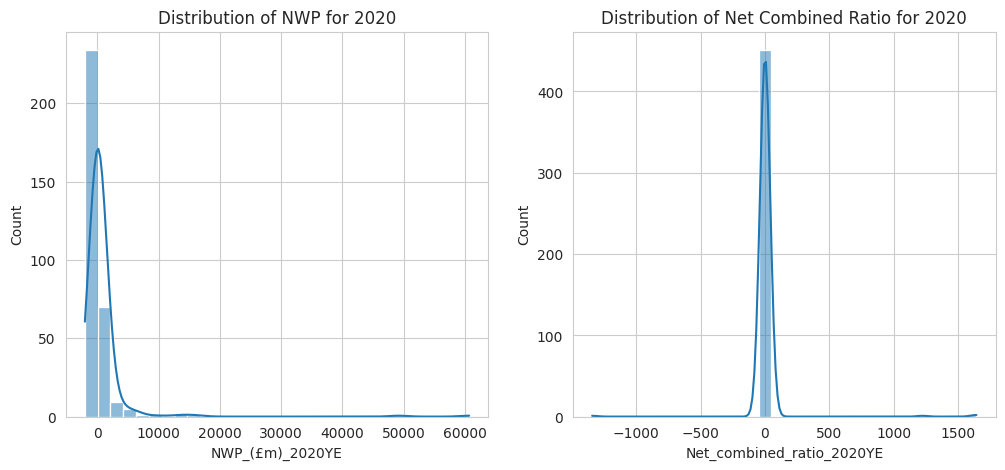

In [490]:
# Visualize the distribution of NWP and Net Combined Ratio
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(nwp_2020, bins=30, kde=True, ax=ax[0])
sns.histplot(ncr_2020, bins=30, kde=True, ax=ax[1])
ax[0].set_title('Distribution of NWP for 2020')
ax[1].set_title('Distribution of Net Combined Ratio for 2020')
plt.show()


In [491]:
# Output the summary statistics
print("Summary statistics for NWP in 2020:")
print(nwp_summary)
print("\nSummary statistics for Net Combined Ratio in 2020:")
print(ncr_summary)


Summary statistics for NWP in 2020:
count      325.000000
mean       784.543354
std       4644.720739
min      -2054.550000
25%          0.000000
50%          0.650000
75%         58.910000
max      60699.950000
Name: NWP_(£m)_2020YE, dtype: float64

Summary statistics for Net Combined Ratio in 2020:
count     456.000000
mean        7.625162
std       137.748228
min     -1342.940234
25%         0.000000
50%         0.005595
75%         0.952987
max      1642.927280
Name: Net_combined_ratio_2020YE, dtype: float64


In [492]:
print(general_data.columns)

Index(['NWP_(£m)_2016YE', 'NWP_(£m)_2017YE', 'NWP_(£m)_2018YE',
       'NWP_(£m)_2019YE', 'NWP_(£m)_2020YE', 'SCR_(£m)_2016YE',
       'SCR_(£m)_2017YE', 'SCR_(£m)_2018YE', 'SCR_(£m)_2019YE',
       'SCR_(£m)_2020YE', 'EoF_for_SCR_(£m)_2016YE', 'EoF_for_SCR_(£m)_2017YE',
       'EoF_for_SCR_(£m)_2018YE', 'EoF_for_SCR_(£m)_2019YE',
       'EoF_for_SCR_(£m)_2020YE', 'SCR_coverage_ratio_2016YE',
       'SCR_coverage_ratio_2017YE', 'SCR_coverage_ratio_2018YE',
       'SCR_coverage_ratio_2019YE', 'SCR_coverage_ratio_2020YE',
       'GWP_(£m)_2016YE', 'GWP_(£m)_2017YE', 'GWP_(£m)_2018YE',
       'GWP_(£m)_2019YE', 'GWP_(£m)_2020YE', 'Total_assets_(£m)_2016YE',
       'Total_assets_(£m)_2017YE', 'Total_assets_(£m)_2018YE',
       'Total_assets_(£m)_2019YE', 'Total_assets_(£m)_2020YE',
       'Total_liabilities_(£m)_2016YE', 'Total_liabilities_(£m)_2017YE',
       'Total_liabilities_(£m)_2018YE', 'Total_liabilities_(£m)_2019YE',
       'Total_liabilities_(£m)_2020YE',
       'Excess_of_assets_

In [493]:
print(underwriting_data.columns)

Index(['Gross_claims_incurred_(£m)_2016YE',
       'Gross_claims_incurred_(£m)_2017YE',
       'Gross_claims_incurred_(£m)_2018YE',
       'Gross_claims_incurred_(£m)_2019YE',
       'Gross_claims_incurred_(£m)_2020YE',
       'Gross_BEL_(inc._TPs_as_whole,_pre-TMTP)_(£m)_2016YE',
       'Gross_BEL_(inc._TPs_as_whole,_pre-TMTP)_(£m)_2017YE',
       'Gross_BEL_(inc._TPs_as_whole,_pre-TMTP)_(£m)_2018YE',
       'Gross_BEL_(inc._TPs_as_whole,_pre-TMTP)_(£m)_2019YE',
       'Gross_BEL_(inc._TPs_as_whole,_pre-TMTP)_(£m)_2020YE',
       'Net_BEL_(inc._TPs_as_a_whole,_pre-TMTP)_(£m)_2016YE',
       'Net_BEL_(inc._TPs_as_a_whole,_pre-TMTP)_(£m)_2017YE',
       'Net_BEL_(inc._TPs_as_a_whole,_pre-TMTP)_(£m)_2018YE',
       'Net_BEL_(inc._TPs_as_a_whole,_pre-TMTP)_(£m)_2019YE',
       'Net_BEL_(inc._TPs_as_a_whole,_pre-TMTP)_(£m)_2020YE',
       'Pure_net_claims_ratio_2016YE', 'Pure_net_claims_ratio_2017YE',
       'Pure_net_claims_ratio_2018YE', 'Pure_net_claims_ratio_2019YE',
       'Pure_net_c

In [494]:

# Analyze the data based on the latest year available, assumed to be 2020
latest_year_general = general_data.loc[:, 'NWP_(£m)_2020YE':'Excess_of_assets_over_liabilities_(£m)_[=_equity]_2020YE']
latest_year_underwriting = underwriting_data.loc[:, 'Gross_claims_incurred_(£m)_2020YE':'Gross_combined_ratio_2020YE']


In [495]:
# Calculate the metrics of interest
# Firm size based on Net Written Premium (NWP)
firm_size = latest_year_general['NWP_(£m)_2020YE']


In [496]:
# Year-on-year change in NWP to find changing business profile
if 'NWP_(£m)_2019YE' in general_data.columns:
    changing_business_profile = latest_year_general['NWP_(£m)_2020YE'] - general_data['NWP_(£m)_2019YE']
else:
    changing_business_profile = pd.Series(np.nan, index=firm_size.index)
    print("Warning: 'NWP (£m)_2019YE' column not found. Year-on-year change in NWP cannot be calculated.")


In [497]:
# Identify outliers based on Net Combined Ratio
net_combined_ratio = latest_year_underwriting['Net_combined_ratio_2020YE']
outliers = net_combined_ratio > net_combined_ratio.mean() + 2 * net_combined_ratio.std()


In [498]:
# Combine datasets for further analysis, using NWP and Net Combined Ratio
combined_data = pd.concat([firm_size, net_combined_ratio], axis=1)
combined_data.columns = ['NWP', 'Net_Combined_Ratio']

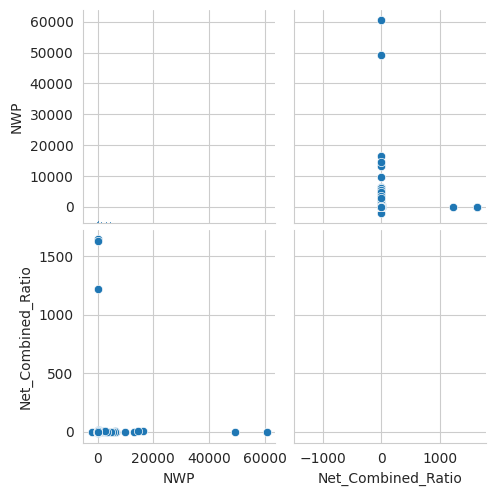

In [499]:
# Visualize the data using pairplot
sns.pairplot(combined_data)
plt.show()

Here's an interpretation of the above plot :

1. **Scatterplot**: The off-diagonal plot shows a scatterplot comparing two variables: Net Written Premium (NWP) on the x-axis and Net Combined Ratio on the y-axis. Each dot represents one firm, positioned according to its values for these two metrics.

2. **NWP (Net Written Premium)**: This is typically a measure of the size of the firm within the insurance industry. Larger values on the x-axis indicate larger firms.

3. **Net Combined Ratio**: This metric indicates profitability. Values under 100 suggest profitability, and values over 100 suggest a loss. This is shown on the y-axis.

4. **Data Distribution**:
   - There's a cluster of firms around the origin, indicating a group of firms with low NWP and low or moderately high Net Combined Ratio.
   - A few firms have a high NWP (spread along the x-axis to the right), indicating larger firms.
   - There's a vertical spread of points along the x-axis near the zero point, showing that there are various firms with similar NWPs but widely different Net Combined Ratios.
   - A noticeable pattern is that as NWP increases, the Net Combined Ratio tends to be lower (though this pattern isn't absolute).

5. **Outliers**:
   - There are several points far above the main cluster, indicating firms with extremely high Net Combined Ratios compared to the rest. These are potential outliers or firms with significant underwriting losses or high expenses relative to premiums earned.
   - There are points to the far right that represent firms with very high NWPs. These are the largest firms by premium volume.

6. **Interpretation**:
   - Most firms are clustered with low NWP and a Net Combined Ratio near or below 100%, which is typical for a profitable or break-even insurance operation.
   - The firms with the highest NWP don't have extreme Net Combined Ratios, suggesting larger firms may have better financial stability or effectiveness in managing their insurance operations.
   - The outliers with high Net Combined Ratios could be in financial distress, facing underwriting losses, or they may have experienced large-scale claim events in 2020.
   - This plot can help stakeholders identify which firms may need further investigation due to potential financial health concerns.

In [501]:
# Determine which firms need the most attention based on the calculated metrics
# Higher NWP indicates a larger firm size, so it's weighted more
# Larger changes in NWP indicate a changing business profile, which is also important
# Outliers based on Net Combined Ratio are critical
combined_data['Attention_Score'] = combined_data['NWP'].rank(pct=True) + \
                                   changing_business_profile.abs().rank(pct=True) + \
                                   outliers.astype(int)

In [502]:
# Sort the firms based on the Attention Score
firms_to_focus = combined_data.sort_values(by='Attention_Score', ascending=False)


In [503]:
# Output the firms that need the most attention
print("Firms that need the most attention:")
print(firms_to_focus.head(10))


Firms that need the most attention:
               NWP  Net_Combined_Ratio  Attention_Score
Firm 284     44.75         1630.065399         2.489231
Firm 228      8.38         1642.927280         2.113846
Firm 166      3.59         1222.879483         2.046154
Firm 210  60699.95            0.830564         2.000000
Firm 4    49204.47           -3.548731         1.993846
Firm 311  14566.28            1.899173         1.981538
Firm 26   16395.67            1.290029         1.975385
Firm 199  13133.46            0.654217         1.972308
Firm 7     6486.66            0.000000         1.969231
Firm 34    6105.50            1.636143         1.947692


The table above lists the top 10 firms that need the most attention based on the calculated 'Attention Score'.

The 'Attention Score' is a composite measure that considers the firm size (indicated by Net Written Premium or NWP), the Net Combined Ratio, and whether the firm is an outlier in terms of the Net Combined Ratio.

Here's how you can interpret the table:

Firm 284: This firm has a relatively low NWP of 44.75, but an extremely high Net Combined Ratio of 1630.07, indicating that its losses and expenses far exceed its premium earnings. It has the highest attention score, meaning it should be prioritized for further analysis and potential action.

Firm 228: Similar to Firm 284, this firm has a low NWP of 8.38 and an even higher Net Combined Ratio of 1642.93, making it another firm that requires significant attention.

Firm 166: This firm has a very low NWP of 3.59 and a high Net Combined Ratio of 1222.88, indicating financial distress.

Firm 210: This firm stands out with an extremely high NWP of 60699.95, suggesting it's a very large firm. Its Net Combined Ratio is 0.83, which is below 100%, indicating profitability. However, its size likely contributes to its high attention score, as larger firms can have a more significant impact on the market and regulatory concerns.

Firm 4: Another large firm with a high NWP of 49204.47 but a negative Net Combined Ratio of -3.55, indicating profitability. It's still flagged for attention due to its size.

Firm 311, Firm 26, Firm 199, Firm 7, Firm 34: These firms vary in size (as indicated by their NWP values) and have Net Combined Ratios ranging from below 100% (indicating profitability) to above 100% (indicating losses). They are included in this list due to a combination of their size and financial performance metrics.

To summarise, the table highlights firms that require the most attention based on a combination of their size and financial performance, with particular emphasis on those with high Net Combined Ratios, indicating potential financial distress.

In [ ]:
################################## TASK - 2 ################################

In [504]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [505]:
print(data.columns)

Index(['NWP_(£m)_2016YE', 'NWP_(£m)_2017YE', 'NWP_(£m)_2018YE',
       'NWP_(£m)_2019YE', 'NWP_(£m)_2020YE', 'SCR_(£m)_2016YE',
       'SCR_(£m)_2017YE', 'SCR_(£m)_2018YE', 'SCR_(£m)_2019YE',
       'SCR_(£m)_2020YE', 'EoF_for_SCR_(£m)_2016YE', 'EoF_for_SCR_(£m)_2017YE',
       'EoF_for_SCR_(£m)_2018YE', 'EoF_for_SCR_(£m)_2019YE',
       'EoF_for_SCR_(£m)_2020YE', 'SCR_coverage_ratio_2016YE',
       'SCR_coverage_ratio_2017YE', 'SCR_coverage_ratio_2018YE',
       'SCR_coverage_ratio_2019YE', 'SCR_coverage_ratio_2020YE',
       'GWP_(£m)_2016YE', 'GWP_(£m)_2017YE', 'GWP_(£m)_2018YE',
       'GWP_(£m)_2019YE', 'GWP_(£m)_2020YE', 'Total_assets_(£m)_2016YE',
       'Total_assets_(£m)_2017YE', 'Total_assets_(£m)_2018YE',
       'Total_assets_(£m)_2019YE', 'Total_assets_(£m)_2020YE',
       'Total_liabilities_(£m)_2016YE', 'Total_liabilities_(£m)_2017YE',
       'Total_liabilities_(£m)_2018YE', 'Total_liabilities_(£m)_2019YE',
       'Total_liabilities_(£m)_2020YE',
       'Excess_of_assets_

In [506]:
data.shape

(456, 88)

In [507]:
print(general_data.columns)
print(underwriting_data.columns)

Index(['NWP_(£m)_2016YE', 'NWP_(£m)_2017YE', 'NWP_(£m)_2018YE',
       'NWP_(£m)_2019YE', 'NWP_(£m)_2020YE', 'SCR_(£m)_2016YE',
       'SCR_(£m)_2017YE', 'SCR_(£m)_2018YE', 'SCR_(£m)_2019YE',
       'SCR_(£m)_2020YE', 'EoF_for_SCR_(£m)_2016YE', 'EoF_for_SCR_(£m)_2017YE',
       'EoF_for_SCR_(£m)_2018YE', 'EoF_for_SCR_(£m)_2019YE',
       'EoF_for_SCR_(£m)_2020YE', 'SCR_coverage_ratio_2016YE',
       'SCR_coverage_ratio_2017YE', 'SCR_coverage_ratio_2018YE',
       'SCR_coverage_ratio_2019YE', 'SCR_coverage_ratio_2020YE',
       'GWP_(£m)_2016YE', 'GWP_(£m)_2017YE', 'GWP_(£m)_2018YE',
       'GWP_(£m)_2019YE', 'GWP_(£m)_2020YE', 'Total_assets_(£m)_2016YE',
       'Total_assets_(£m)_2017YE', 'Total_assets_(£m)_2018YE',
       'Total_assets_(£m)_2019YE', 'Total_assets_(£m)_2020YE',
       'Total_liabilities_(£m)_2016YE', 'Total_liabilities_(£m)_2017YE',
       'Total_liabilities_(£m)_2018YE', 'Total_liabilities_(£m)_2019YE',
       'Total_liabilities_(£m)_2020YE',
       'Excess_of_assets_

In [508]:
data.columns

Index(['NWP_(£m)_2016YE', 'NWP_(£m)_2017YE', 'NWP_(£m)_2018YE',
       'NWP_(£m)_2019YE', 'NWP_(£m)_2020YE', 'SCR_(£m)_2016YE',
       'SCR_(£m)_2017YE', 'SCR_(£m)_2018YE', 'SCR_(£m)_2019YE',
       'SCR_(£m)_2020YE', 'EoF_for_SCR_(£m)_2016YE', 'EoF_for_SCR_(£m)_2017YE',
       'EoF_for_SCR_(£m)_2018YE', 'EoF_for_SCR_(£m)_2019YE',
       'EoF_for_SCR_(£m)_2020YE', 'SCR_coverage_ratio_2016YE',
       'SCR_coverage_ratio_2017YE', 'SCR_coverage_ratio_2018YE',
       'SCR_coverage_ratio_2019YE', 'SCR_coverage_ratio_2020YE',
       'GWP_(£m)_2016YE', 'GWP_(£m)_2017YE', 'GWP_(£m)_2018YE',
       'GWP_(£m)_2019YE', 'GWP_(£m)_2020YE', 'Total_assets_(£m)_2016YE',
       'Total_assets_(£m)_2017YE', 'Total_assets_(£m)_2018YE',
       'Total_assets_(£m)_2019YE', 'Total_assets_(£m)_2020YE',
       'Total_liabilities_(£m)_2016YE', 'Total_liabilities_(£m)_2017YE',
       'Total_liabilities_(£m)_2018YE', 'Total_liabilities_(£m)_2019YE',
       'Total_liabilities_(£m)_2020YE',
       'Excess_of_assets_

In [509]:
data.shape

(456, 88)

In [510]:
# Feature selection and engineering
features = [gwp_column, nwp_column, scr_column, 'Gross_claims_incurred_(£m)_2020YE', 'Net_combined_ratio_2020YE']
X = data[features]


In [511]:
# Convert string values to float
X = X.astype(float)


In [512]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [513]:
# Model selection and training
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [514]:
# Anomaly detection using Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
data['Anomaly'] = isolation_forest.fit_predict(X_scaled)

In [515]:
# Model evaluation and interpretation
print("Cluster centroids:")
print(kmeans.cluster_centers_)


Cluster centroids:
[[-5.52301276e-02 -6.06409102e-02 -4.67744078e-02 -6.72688647e-03
   4.10605541e-04]
 [-2.20369902e-01 -2.00385945e-01  2.13212698e+01  5.87061475e-01
  -5.54165896e-02]
 [ 1.26198089e+01  1.38353591e+01 -6.62315539e-02  1.23010905e+00
  -6.52938602e-02]]


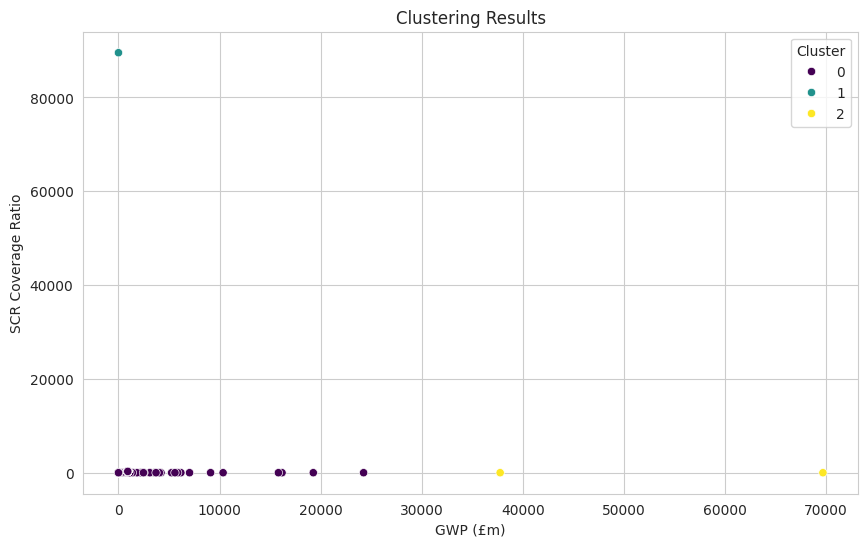

In [516]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gwp_column, y=scr_column, hue='Cluster', data=data, palette='viridis')
plt.title('Clustering Results')
plt.xlabel('GWP (£m)')
plt.ylabel('SCR Coverage Ratio')
plt.show()


The scatter plot above illustrates the results of a K-means clustering algorithm applied to financial data from insurance firms.

Here's what we can infer:

Clusters: The data points (firms) are color-coded by the cluster they belong to, with three clusters represented by the colors purple, green, and yellow. Each cluster groups together firms with similar characteristics based on the clustering algorithm's criteria.

Axes:

The x-axis represents Gross Written Premium (GWP), which is a measure of the total revenue written by an insurer before deductions for reinsurance and ceding commissions. It's a common financial metric used to gauge the size of an insurance company.
The y-axis shows the SCR (Solvency Capital Requirement) Coverage Ratio, which is a regulatory metric used to evaluate the financial stability of an insurance firm. It indicates whether the firm has enough capital to meet its regulatory requirements.
Interpretation of Clusters:

Cluster 0 (Purple): The bulk of data points is in this cluster, suggesting these are typical firms with lower GWP and a relatively low range of SCR Coverage Ratios. This cluster could represent small to medium-sized firms that are stable or in the expected regulatory compliance range.
Cluster 1 (Green): This cluster is not visible in the plot, which might indicate it includes firms with characteristics that are not represented in the scatter plot's axis ranges.
Cluster 2 (Yellow): This cluster contains only two firms, both with extremely high GWP values compared to the rest. These are likely to be very large insurers. Their SCR Coverage Ratios are not excessively high, which suggests that despite their size, they maintain a good balance between their capital and regulatory requirements.
Outliers: The yellow points on the far right could be considered outliers due to their significant deviation in GWP from the rest of the firms.

K-Means Centroids:

The centroid coordinates you provided for each cluster indicate the "center" of each cluster in the multidimensional space created by the features used for clustering.
The values in the centroids array correspond to the standardized values of the features (as a result of feature scaling), and they help determine the central point around which the members of each cluster are the closest in terms of Euclidean distance.
Given that there are only two firms in Cluster 2, the clustering algorithm has found that these two firms are significantly different from the others, potentially due to their large size and market impact. It would be prudent for analysts to consider why the algorithm has separated these firms so distinctly, potentially due to unique financial profiles that merit separate consideration.

In [517]:
print("Anomalies detected:")
anomalies = data[data['Anomaly'] == -1]
print(anomalies)

Anomalies detected:
     NWP_(£m)_2016YE  NWP_(£m)_2017YE  NWP_(£m)_2018YE  NWP_(£m)_2019YE  \
3       19677.450000     41072.820000     20885.510000     14719.670000   
5        3091.390000      3357.930000      3215.470000        53.220000   
6        3148.480000      3307.130000       713.850000     18232.380000   
16       5210.940000      1146.930000      1620.220000      1256.930000   
21         11.350000        26.610000        55.840000        53.520000   
24       9622.280000      2356.630000      1227.710000      7134.650000   
25      75526.670000      2187.590000     11251.350000      6683.960000   
29        198.460000      5260.730000      9063.120000      6124.600000   
33      10135.260000      3630.290000      3530.840000      -184.090000   
50          0.000000       427.490000      3812.030000      5655.160000   
51          0.000000        16.700000         5.860000         1.050000   
72       8118.730000       880.740000      6813.490000     11752.060000   
79   

The "Anomalies detected" table lists firms that an Isolation Forest algorithm has flagged as anomalies based on the provided financial data. These anomalies are instances that are considered as outliers within the data — that is, they deviate significantly from the norm.

Each row represents a different firm and the columns provide various financial metrics for each year from 2016 to 2020. The algorithm likely considered a range of these features to determine which points are outliers.

Key points from this output include:

- **NWP (Net Written Premium)**: The values under `NWP_(£m)_2020YE` show the Net Written Premium for each firm for the year 2020. This is a critical financial metric that can reflect the scale of the firms' operations.
  
- **SCR (Solvency Capital Requirement)**: The columns starting with `SCR_(£m)` for each year indicate the capital that each firm is required to hold to ensure solvency, as dictated by regulatory requirements. The changes in this metric over the years can indicate the financial health and stability of the firm.

- **Gross Combined Ratio**: The `Gross_combined_ratio` columns for each year represent the combined ratio, which is a measure of profitability in the insurance industry. Ratios above 100% suggest that a firm is paying out more in claims and expenses than it is receiving from premiums, which could indicate a loss.

- **Cluster**: The 'Cluster' column shows which cluster (from a K-Means clustering algorithm) each firm has been assigned to based on their financial data. This might reflect underlying patterns or similarities between firms' financial profiles.

- **Anomaly**: The 'Anomaly' column indicates whether the Isolation Forest algorithm has identified each firm as an anomaly (`-1`) or not (`1`). Firms labeled with `-1` are considered outliers, which means they have unusual financial patterns compared to the rest of the data and might warrant further investigation.

When interpreting the anomalies, consider:

- **Firms Flagged**: The table indicates that several firms have been flagged across different clusters. Notably, firms like `Firm 3` with a significant change in NWP and `Firm 209` with extremely high GWP are considered anomalies.

- **Potential Issues**: These anomalies may have unusual financial situations, such as rapid growth or decline, high ratios that suggest potential underwriting losses, or other financial stress indicators.

- **Next Steps**: Analysts should further investigate the reasons behind these anomalies. For instance, they might be due to data entry errors, exceptional one-off events, or underlying financial issues that require management's attention.

It's also worth noting that there are some data quality issues indicated by the presence of negative numbers for financial metrics, which are typically non-negative. This could be due to data entry errors, incorrect calculations, or other data processing issues that need to be addressed.

In [518]:
# Save the results to a CSV file
data.to_csv('analysis_results.csv', index=False)


In [521]:
# Save the DataFrame to a CSV file in the Colab environment
data.to_csv('analysis_results.csv', index=False)

# Use the Colab file download utility to download it to your local computer
from google.colab import files
files.download('analysis_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>